# Word Cloud
전주 여행, 경주여행 네이버 지식인 내용 시각화

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
ls data

heart.jpg                       trade_apt_api_2023.txt
naver_kin.txt                   trade_apt_api_2023_address.txt
naver_kin_pos.txt               wordcloud.jpg


In [64]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.head()

,query,no,title,link,description,total_text
0,전주 여행,1,전주여행 코스 추천,https://kin.naver.com/qna/detail.naver?d1id=12...,안녕하세요 여자친구랑 전주여행을 갈예정인데 숙소를 전주 더클래식호텔로 잡고 1박2일...,전주여행 코스 추천 안녕하세요 여자친구랑 전주여행을 갈예정인데 숙소를 전주 더클래식...
1,전주 여행,2,"전주여행 갈곳, 전시회 추천",https://kin.naver.com/qna/detail.naver?d1id=9&...,제가 이번달 말에 남자친구랑 전주여행을 가는데요. 전주한옥마을만 가기엔 그래서 갈만...,"전주여행 갈곳, 전시회 추천 제가 이번달 말에 남자친구랑 전주여행을 가는데요. 전주..."
2,전주 여행,3,여자2명이서2박3일로 전주여행질문,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 아님 없으면 전주에있다가 다른지역으로 가깝게갈수 있는데 있으시면 알려주세요 ...,여자2명이서2박3일로 전주여행질문 ... 아님 없으면 전주에있다가 다른지역으로 가깝...
3,전주 여행,4,1박2일 전주 혼자 여행 코스,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 질문하신 전주 여행정보 정리해봤습니다. 참고해주세요. ㅎ 전주에서 가볼만한 ...,1박2일 전주 혼자 여행 코스 ... 질문하신 전주 여행정보 정리해봤습니다. 참고해...
4,전주 여행,5,전주 여행코스 짜주세요! 많이 급합니다..!,https://kin.naver.com/qna/detail.naver?d1id=12...,안녕하세요.가족여행으로 전주에 놀러가려는데요. 당장 이번주 금요일에 가는데 어딜갈지...,전주 여행코스 짜주세요! 많이 급합니다..! 안녕하세요.가족여행으로 전주에 놀러가려...


- 형태소 분석: 글들을 단어 단위로 쪼개는 것

In [65]:
# 형태소 분석기: 코모란 품사표
# https://docs.komoran.kr/firststep/postypes.html
import pandas as pd
df = pd.read_csv('data/naver_kin_pos.txt', sep='\t') # by komoran
df.head(10) # 각 문장들을 형태소 단위로 쪼개서 보여줌

,query,no,token,pos
0,행,88,...,SE
1,경주 여행,88,자세,XR
2,경주 여행,88,하,XSA
3,경주 여행,88,ㄴ,ETM
4,경주 여행,88,답변,NNG
5,경주 여행,88,부탁,NNG
6,경주 여행,88,드리,VV
7,경주 여행,88,어요,EC
8,경주 여행,88,~,SO
9,경주 여행,88,복사,NNP


In [66]:
# NNP 고유명사 ,NNG 일반명사
df_flt = df.loc[(df['pos'] == 'NNP') | (df['pos'] == 'NNG'),['query', 'no', 'token']] # 질문, 문장번호, 형태소
df_flt.head()

,query,no,token
4,경주 여행,88,답변
5,경주 여행,88,부탁
9,경주 여행,88,복사
11,경주 여행,88,동문서답
13,경주 여행,88,여행


In [67]:
df_flt2 = df_flt[['query', 'token']]
df_flt2

,query,token
4,경주 여행,답변
5,경주 여행,부탁
9,경주 여행,복사
11,경주 여행,동문서답
13,경주 여행,여행
...,...,...
94068,경주 여행,곳
94072,경주 여행,바다
94083,경주 여행,요즘
94086,경주 여행,겨울


In [68]:
df_grp = df_flt2.groupby('query')['token'].apply(list)
df_grp

query
경주 여행    [답변, 부탁, 복사, 동문서답, 여행, 코스, 추천, 답변, 안녕하세요, 이상, ...
전주 여행    [여행, 코스, 추천, 안녕하세요, 여자친구, 여행, 예정, 숙소, 더, 클래식, ...
Name: token, dtype: object

In [69]:
type(df_grp)

pandas.core.series.Series

In [70]:
str(df_grp[0][:5])

"['답변', '부탁', '복사', '동문서답', '여행']"

In [71]:
data = str(df_grp[0]).replace("'", "") # 전체를 하나의 스트링으로 바꿔줌

In [72]:
data[:10]

'[답변, 부탁, 복'

In [73]:
color_map = "Blues"
fontpath="./NanumGothic.ttf"

In [74]:
wordcloud = WordCloud(
    background_color= 'white',
    colormap = color_map,
    collocations = False, # collocations : bigram처럼 token 2개를 붙여서 표시
    max_words= 200,
    max_font_size= 150,
    scale= 3, # scale : 제일 많은 token과 제일 적은 token 사이의 크기 차이
    random_state=777,
    font_path=fontpath).generate(data) # font_path : 폰트 경로 지정. 한글일 경우, 지정해주어야글자가 깨지지 않음.

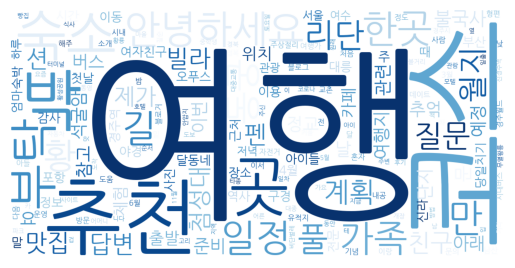

In [75]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
import numpy as np
from PIL import Image
mask_file = np.array(Image.open("data/heart.jpg"))

In [77]:
wordcloud = WordCloud(
    background_color=   'white',
    colormap = 'RdBu',
    collocations = False, # collocations : bigram처럼 token 2개를 붙여서 표시
    max_words= 200,
    max_font_size= 150,
    scale= 3, # scale : 제일 많은 token과 제일 적은 token 사이의 크기 차이
    random_state=777,
    mask = mask_file,
    font_path=fontpath).generate(data) # font_path : 폰트 경로 지정. 한글일 경우, 지정해주어야글자가 깨지지 않음.

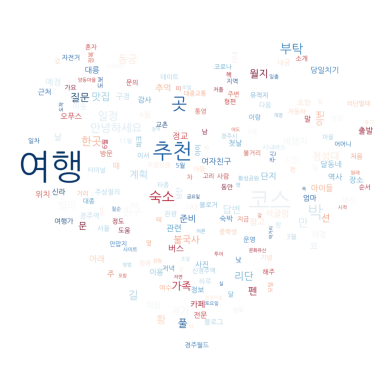

In [78]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [79]:
wordcloud.to_file('data/wordcloud.jpg')

# Folium - 지도 시각화

In [80]:
import folium
import pandas as pd

In [81]:
df = pd.read_csv('data/trade_apt_api_2023_address.txt', sep='\t')
df.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"138,000",2023,6,9,2008,95.880,9,9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"170,000",2023,6,10,2008,146.920,9,8
2,202306,종로구,11110,사직동,사직아파트,"84,000",2023,6,12,1970,116.230,1-8,6
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,"93,000",2023,6,20,1981,149.950,145,9
4,202306,종로구,11110,신문로2가,디팰리스,"408,000",2023,6,24,2020,148.111,171,10


## 전처리

In [82]:
# 정수 형변환
df['거래금액'] = df['거래금액'].str.replace(',', '').replace(' ','').astype(int)
df['거래금액'].head()

0    138000
1    170000
2     84000
3     93000
4    408000
Name: 거래금액, dtype: int64

In [83]:
# 주소 합치기
df['주소'] = '서울시 '+ df['지역명'] + ' ' +df['법정동'] + ' ' + df['지번']
df['주소'][:5]

0        서울시 종로구  사직동 9
1        서울시 종로구  사직동 9
2      서울시 종로구  사직동 1-8
3      서울시 종로구  당주동 145
4    서울시 종로구  신문로2가 171
Name: 주소, dtype: object

In [84]:
df_jr = df.loc[(df['지역명'] == '종로구') & (df['기준년월']>=202301), :]
df_jr.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층,주소
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),138000,2023,6,9,2008,95.880,9,9,서울시 종로구 사직동 9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),170000,2023,6,10,2008,146.920,9,8,서울시 종로구 사직동 9
2,202306,종로구,11110,사직동,사직아파트,84000,2023,6,12,1970,116.230,1-8,6,서울시 종로구 사직동 1-8
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,93000,2023,6,20,1981,149.950,145,9,서울시 종로구 당주동 145
4,202306,종로구,11110,신문로2가,디팰리스,408000,2023,6,24,2020,148.111,171,10,서울시 종로구 신문로2가 171


In [85]:
# 거래건에 대한 내용 -> 같은 주소여도 여러 개의 거래가 있을 수 있음 -> 그룹화
df_jr_grp = df_jr.groupby('주소')['거래금액'].mean()
df_jr_grp.head()

주소
서울시 종로구  구기동 125-5     56000.000000
서울시 종로구  내수동 72       220000.000000
서울시 종로구  내수동 73       184000.000000
서울시 종로구  내수동 95       183333.333333
서울시 종로구  당주동 145       93000.000000
Name: 거래금액, dtype: float64

In [86]:
# 지오코딩 -> 주소를 위도, 경도 좌표로 바꿔주는 것. 
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y
    except:
        return [0, 0]

In [87]:
# 구글 37.573492  126.9791404
lat_start, lng_start = geocoding('서울시 종로구 종로1길 36')
lat_start, lng_start

(37.5735224, 126.97900962494623)

In [88]:
m = folium.Map(location=[37.573492, 126.9791404], zoom_start=15, tiles='cartodbpositron')
# m = folium.Map(location=[37.573492, 126.9791404], zoom_start=15, tiles='cartodbpositron', width=800, height=450)
# OpenStreetMap( ), Stamen Toner, cartodbpositron
m

In [89]:
m = folium.Map(location = [lat_start, lng_start], zoom_start=20, tiles ='OpenStreetMap')
display(m)

In [90]:
# 마커 찍기!
lat = 37.4809165
lng = 127.0123303
m = folium.Map(location=[lat, lng], zoom_start=19, tiles='OpenStreetMap')

folium.Marker([lat, lng], popup="ESTSOFT", tooltip="Welcome to ESTSOFT",icon=folium.Icon(color='red', icon='glyphicon-heart')).add_to(m)
# https://getbootstrap.com/docs/3.3/components/
m

In [91]:
df_jr_grp.head()

주소
서울시 종로구  구기동 125-5     56000.000000
서울시 종로구  내수동 72       220000.000000
서울시 종로구  내수동 73       184000.000000
서울시 종로구  내수동 95       183333.333333
서울시 종로구  당주동 145       93000.000000
Name: 거래금액, dtype: float64

In [92]:
# 아파트 거래가 있는 주소, 거래금액를 지도에 표현해보자.

m = folium.Map(location =  [lat_start, lng_start], zoom_start=14, tiles ='OpenStreetMap')

for address, price in zip(df_jr_grp.index, df_jr_grp):
    lat, lng = geocoding(address)
    folium.Marker([lat, lng],
                  tooltip=price,
                  icon=folium.Icon(color='red', icon='glyphicon-ok')).add_to(m) # bootstrap icon
display(m)

# Model Evaluation

## EDA
Exploratory Data Analysis, 탐색적 데이터 분석

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 주의 메시지 숨기기
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('data/trade_apt_api_2023.txt', sep='\t')
# df['거래금액'] = df['거래금액'].str.replace(',', '').str.replace(' ', '').astype(int)
df.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,층
0,202306,서울시 종로구,11110,사직동,광화문스페이스본(101동~105동),"138,000",2023,6,9,2008,95.880,9
1,202306,서울시 종로구,11110,사직동,광화문스페이스본(101동~105동),"170,000",2023,6,10,2008,146.920,8
2,202306,서울시 종로구,11110,사직동,사직아파트,"84,000",2023,6,12,1970,116.230,6
3,202306,서울시 종로구,11110,당주동,롯데미도파광화문빌딩,"93,000",2023,6,20,1981,149.950,9
4,202306,서울시 종로구,11110,신문로2가,디팰리스,"408,000",2023,6,24,2020,148.111,10


In [95]:
# 강남구 추출
df_gn = df.loc[df['지역코드']==11680, :]
df_gn.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,층
303,202306,서울시 강남구,11680,역삼동,경남아너스빌,"149,500",2023,6,1,2002,81.0130,8
304,202306,서울시 강남구,11680,역삼동,역삼래미안,"155,000",2023,6,1,2005,59.4000,4
305,202306,서울시 강남구,11680,역삼동,e-편한세상,"256,000",2023,6,1,2005,84.9910,8
306,202306,서울시 강남구,11680,역삼동,테헤란아이파크,"240,000",2023,6,3,2014,70.8333,20
307,202306,서울시 강남구,11680,역삼동,e-편한세상,"242,000",2023,6,3,2005,84.6750,15


In [96]:
df_gn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 303 to 2303
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2001 non-null   int64  
 1   지역명     2001 non-null   object 
 2   지역코드    2001 non-null   int64  
 3   법정동     2001 non-null   object 
 4   아파트     2001 non-null   object 
 5   거래금액    2001 non-null   object 
 6   년       2001 non-null   int64  
 7   월       2001 non-null   int64  
 8   일       2001 non-null   int64  
 9   건축년도    2001 non-null   int64  
 10  전용면적    2001 non-null   float64
 11  층       2001 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 203.2+ KB


In [97]:
df_gn['거래금액'] = df_gn['거래금액'].str.replace(',', '').str.replace(' ', '').astype(int)
df_gn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 303 to 2303
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2001 non-null   int64  
 1   지역명     2001 non-null   object 
 2   지역코드    2001 non-null   int64  
 3   법정동     2001 non-null   object 
 4   아파트     2001 non-null   object 
 5   거래금액    2001 non-null   int64  
 6   년       2001 non-null   int64  
 7   월       2001 non-null   int64  
 8   일       2001 non-null   int64  
 9   건축년도    2001 non-null   int64  
 10  전용면적    2001 non-null   float64
 11  층       2001 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 203.2+ KB


In [98]:
# 평균 거래 금액
price_median = df_gn['거래금액'].median()
price_median

192000.0

In [99]:
# 평균가 비교 라벨 추가
df_gn['구분'] = np.where(df_gn['거래금액'] >= price_median, 1, 0)
df_gn.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,층,구분
303,202306,서울시 강남구,11680,역삼동,경남아너스빌,149500,2023,6,1,2002,81.0130,8,0
304,202306,서울시 강남구,11680,역삼동,역삼래미안,155000,2023,6,1,2005,59.4000,4,0
305,202306,서울시 강남구,11680,역삼동,e-편한세상,256000,2023,6,1,2005,84.9910,8,1
306,202306,서울시 강남구,11680,역삼동,테헤란아이파크,240000,2023,6,3,2014,70.8333,20,1
307,202306,서울시 강남구,11680,역삼동,e-편한세상,242000,2023,6,3,2005,84.6750,15,1


In [100]:
df_fit = df_gn[['건축년도', '전용면적', '층', '구분']]
df_fit.head()

,건축년도,전용면적,층,구분
303,2002,81.0130,8,0
304,2005,59.4000,4,0
305,2005,84.9910,8,1
306,2014,70.8333,20,1
307,2005,84.6750,15,1


### Heatmap

In [101]:
# 상관 분석
corr= df_fit.corr()
corr

,건축년도,전용면적,층,구분
건축년도,1.000000,-0.143791,0.205417,-0.147385
전용면적,-0.143791,1.000000,0.139793,0.646250
층,0.205417,0.139793,1.000000,0.196288
구분,-0.147385,0.646250,0.196288,1.000000


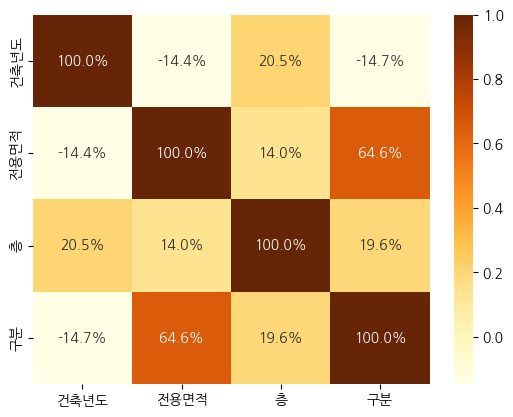

In [102]:
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')
plt.show()

## Modeling

In [103]:
# x, y 데이터 분리
y = df_fit['구분']
X = df_fit.drop(['구분'], axis=1)
y.shape, X.shape

((2001,), (2001, 3))

In [104]:
# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 3), (401, 3), (1600,), (401,))

In [105]:
# 랜덤포레스트 모델링
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8902743142144638

### Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[163,  23],
       [ 21, 194]])

In [107]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(163, 23, 21, 194)

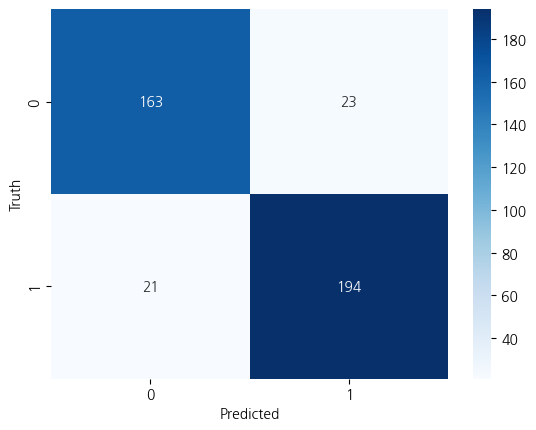

In [108]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## ROC Curve

In [109]:
from sklearn.metrics import roc_curve, auc
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
roc_auc

0.9468242060515129

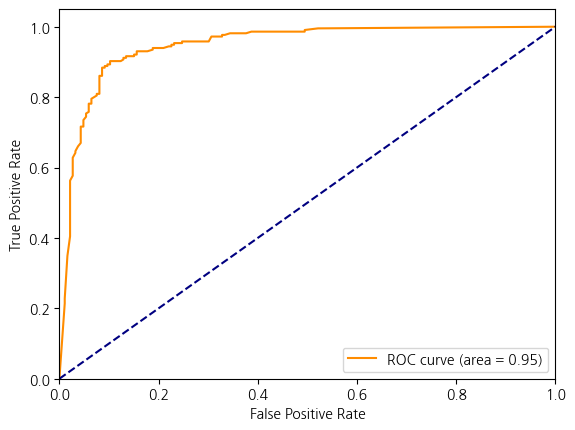

In [110]:
plt.plot(fpr, tpr, color='darkorange',
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### RandomForest Feature Importance

In [111]:
feature_importances_values = model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=X_train.columns)
feature_top = feature_importances.sort_values(ascending=True)
feature_top

층       0.135231
건축년도    0.276613
전용면적    0.588155
dtype: float64

In [112]:
model.feature_importances_, sum(model.feature_importances_)

(array([0.27661334, 0.58815523, 0.13523143]), 1.0)

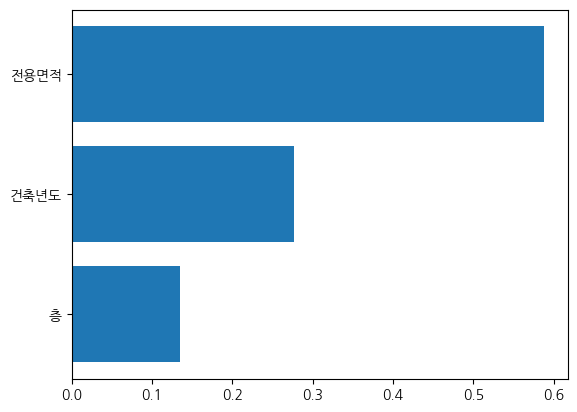

In [113]:
bars = plt.barh(feature_top.index, feature_top.values)
plt.show()

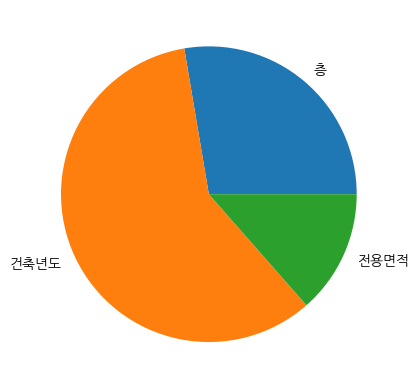

In [114]:
pies = plt.pie(model.feature_importances_, labels=feature_top.index)
plt.show()

### Loss function

In [115]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
40/40 [==============================] - 0s 2ms/step - loss: 4.1923 - accuracy: 0.6562 - val_loss: 1.0821 - val_accuracy: 0.7594
Epoch 2/5
40/40 [==============================] - 0s 794us/step - loss: 0.9055 - accuracy: 0.7664 - val_loss: 0.6575 - val_accuracy: 0.7906
Epoch 3/5
40/40 [==============================] - 0s 1ms/step - loss: 0.8770 - accuracy: 0.7695 - val_loss: 0.8277 - val_accuracy: 0.7781
Epoch 4/5
40/40 [==============================] - 0s 872us/step - loss: 0.7073 - accuracy: 0.7898 - val_loss: 0.8176 - val_accuracy: 0.7781
Epoch 5/5
40/40 [==============================] - 0s 879us/step - loss: 0.8758 - accuracy: 0.7469 - val_loss: 0.7361 - val_accuracy: 0.7781


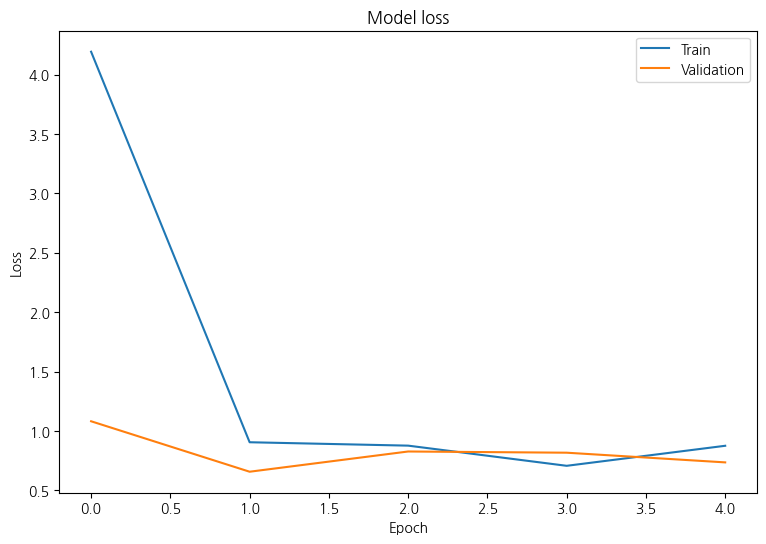

In [116]:
plt.figure(figsize=(9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
# plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### 3D Interactive

In [117]:
# pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [118]:
# pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [119]:
import plotly.express as px

fig = px.scatter_3d(df_gn, x='층', y='건축년도', z='전용면적', color='구분', symbol='구분', opacity=0.5, color_continuous_scale='Bluered')
fig.update_traces(marker=dict(size=3))
fig.show()